In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# **Steps**


1.   Getting Data
2.   Defining the model, the loss and the optimizer
3.   Converting the data to tensors
4.   Train:
* Zero the gradient (**optimizer**.zero_grad())
* Forward pass, loss computation (model(inputs), **criterion**(model_parameters(), lr=0.1)
* Backward pass, step (**loss**.backward(), **optimizer**.step())
5.   Predict:  model(inputs).detach().numpy()






# **Generating Data**

[-2.86498204  2.7532904   2.93408523  1.44519765  0.35565509 -1.56830949
  0.31372041 -3.52043985 -1.4958879  -3.7571983   2.82465872 -4.23784031
 -1.33331473  1.89853754  4.4470258   0.18053934  2.52862118  3.60860606
  4.78442014 -3.29206265]


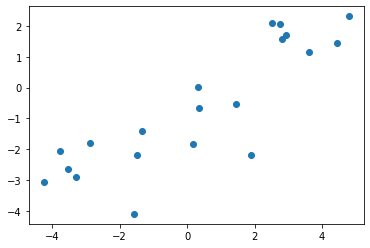

In [2]:
N = 20
X = np.random.random(N)*10-5
print(X)
y = 0.5 * X - 1 + np.random.randn(N) # slope = .5; intercept = -1; Gaussian Noise with mean 0 and var = 1 => MSE is the correct loss function to use
plt.scatter(X,y)

# **PyTorch**

In [3]:
model = nn.Linear(1,1)

In [4]:
# Loss and optimizer
criterien = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
# Reshaping and converting to float32, then to tensors
X = X.reshape(N,1)
y = y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))
print(X)

[[-2.86498204]
 [ 2.7532904 ]
 [ 2.93408523]
 [ 1.44519765]
 [ 0.35565509]
 [-1.56830949]
 [ 0.31372041]
 [-3.52043985]
 [-1.4958879 ]
 [-3.7571983 ]
 [ 2.82465872]
 [-4.23784031]
 [-1.33331473]
 [ 1.89853754]
 [ 4.4470258 ]
 [ 0.18053934]
 [ 2.52862118]
 [ 3.60860606]
 [ 4.78442014]
 [-3.29206265]]


In [6]:
type(inputs)

torch.Tensor

In [7]:
# train
n_epochs = 30
losses = []

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad() # pytorch accumulates gradients when calling backward(), we prevent that here

  # forward pass
  outputs = model(inputs) # we use the model as a function
  loss = criterien(outputs, targets)

  # calculate loss
  losses.append(loss.item())

  # backward and optimize
  loss.backward() # calculates the gradient
  optimizer.step() # step of gd

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')  

Epoch 1/30, Loss: 1.4470
Epoch 2/30, Loss: 1.1962
Epoch 3/30, Loss: 1.0977
Epoch 4/30, Loss: 1.0588
Epoch 5/30, Loss: 1.0433
Epoch 6/30, Loss: 1.0371
Epoch 7/30, Loss: 1.0345
Epoch 8/30, Loss: 1.0335
Epoch 9/30, Loss: 1.0330
Epoch 10/30, Loss: 1.0328
Epoch 11/30, Loss: 1.0327
Epoch 12/30, Loss: 1.0326
Epoch 13/30, Loss: 1.0326
Epoch 14/30, Loss: 1.0326
Epoch 15/30, Loss: 1.0326
Epoch 16/30, Loss: 1.0325
Epoch 17/30, Loss: 1.0325
Epoch 18/30, Loss: 1.0325
Epoch 19/30, Loss: 1.0325
Epoch 20/30, Loss: 1.0325
Epoch 21/30, Loss: 1.0325
Epoch 22/30, Loss: 1.0325
Epoch 23/30, Loss: 1.0325
Epoch 24/30, Loss: 1.0325
Epoch 25/30, Loss: 1.0325
Epoch 26/30, Loss: 1.0325
Epoch 27/30, Loss: 1.0325
Epoch 28/30, Loss: 1.0325
Epoch 29/30, Loss: 1.0325
Epoch 30/30, Loss: 1.0325


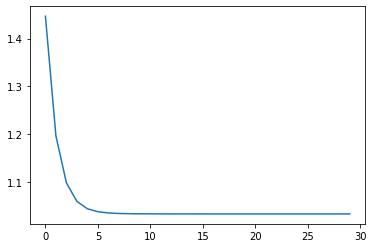

In [8]:
plt.plot(losses)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

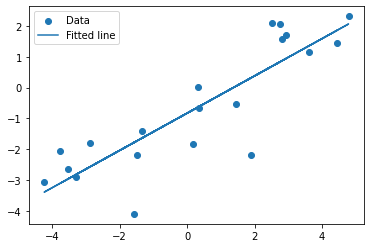

In [9]:
predictions = model(inputs).detach().numpy() # detach() is used to detach the gradient from the tensor (avoids error)
plt.scatter(X, y, label='Data')
plt.plot(X, predictions, label='Fitted line')
plt.legend()
plt.plot

In [10]:
# other way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-2.5642314 ],
       [ 0.8381894 ],
       [ 0.9476785 ],
       [ 0.04600966],
       [-0.6138164 ],
       [-1.7789676 ],
       [-0.639212  ],
       [-2.961176  ],
       [-1.7351091 ],
       [-3.1045568 ],
       [ 0.88140994],
       [-3.395633  ],
       [-1.6366551 ],
       [ 0.3205518 ],
       [ 1.863914  ],
       [-0.71986634],
       [ 0.7021299 ],
       [ 1.3561678 ],
       [ 2.0682397 ],
       [-2.822871  ]], dtype=float32)

In [11]:
# printing weight and bias
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.6055991]] [-0.8292008]
